# **IMPORTING DATASET**

In [1]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"raomuhammaddayanatif","key":"f17b0ee338ba686b74461262c853d3e2"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
!pip install kaggle


In [4]:
!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign


Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
License(s): CC0-1.0
 98% 601M/612M [00:07<00:00, 121MB/s]
100% 612M/612M [00:07<00:00, 84.2MB/s]


In [5]:
!unzip gtsrb-german-traffic-sign.zip -d /content/gtsrb


Streaming output truncated to the last 5000 lines.
  inflating: /content/gtsrb/train/5/00005_00053_00010.png  
  inflating: /content/gtsrb/train/5/00005_00053_00011.png  
  inflating: /content/gtsrb/train/5/00005_00053_00012.png  
  inflating: /content/gtsrb/train/5/00005_00053_00013.png  
  inflating: /content/gtsrb/train/5/00005_00053_00014.png  
  inflating: /content/gtsrb/train/5/00005_00053_00015.png  
  inflating: /content/gtsrb/train/5/00005_00053_00016.png  
  inflating: /content/gtsrb/train/5/00005_00053_00017.png  
  inflating: /content/gtsrb/train/5/00005_00053_00018.png  
  inflating: /content/gtsrb/train/5/00005_00053_00019.png  
  inflating: /content/gtsrb/train/5/00005_00053_00020.png  
  inflating: /content/gtsrb/train/5/00005_00053_00021.png  
  inflating: /content/gtsrb/train/5/00005_00053_00022.png  
  inflating: /content/gtsrb/train/5/00005_00053_00023.png  
  inflating: /content/gtsrb/train/5/00005_00053_00024.png  
  inflating: /content/gtsrb/train/5/00005_00053_0

In [6]:
!rm gtsrb-german-traffic-sign.zip

# **IMPORTING IMPORTANT LIBRARIES**

In [7]:
# Fundamental classes
import numpy as np
import pandas as pd
import tensorflow as tf
import os

# Image related
import cv2
from PIL import Image

# For ploting
import matplotlib.pyplot as plt

# For the model and it's training
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

# RETREIVING **IMAGES**

In [8]:
import os
import numpy as np
from PIL import Image

data = []
labels = []
classes = 43
cur_path = os.getcwd()


for i in range(classes):
    path = os.path.join('/content/gtsrb', 'Train', str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '/' + a)
            image = image.resize((30,30))
            image = np.array(image)
            # sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

data = np.array(data)
labels = np.array(labels)


# **SPLITTING AND ENCODING DATA**

In [9]:

print(data.shape, labels.shape)

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


# **MODEL BUILDING**

In [10]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 22, 22, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 9, 9, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        11,051 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,251 (946.29 KB)

 Trainable params: 242,251 (946.29 KB)

 Non-trainable params: 0 (0.00 B)

# **TRAINING MODEL**

In [11]:
with tf.device('/GPU:0'):
    epochs = 15
    history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.3514 - loss: 2.9403 - val_accuracy: 0.8592 - val_loss: 0.6066
Epoch 2/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7277 - loss: 0.9327 - val_accuracy: 0.9147 - val_loss: 0.3068
Epoch 3/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7958 - loss: 0.6856 - val_accuracy: 0.9339 - val_loss: 0.2505
Epoch 4/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8199 - loss: 0.6019 - val_accuracy: 0.9429 - val_loss: 0.2041
Epoch 5/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8442 - loss: 0.5233 - val_accuracy: 0.9482 - val_loss: 0.1892
Epoch 6/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8712 - loss: 0.4321 - val_accuracy: 0.9617 - val_loss: 0.1351
Epoch 7/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8761 - loss: 0.4146 - val_accuracy: 0.9653 - val_loss: 0.1326
Epoch 8/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8990 - loss: 0.3317 - val_accuracy: 0

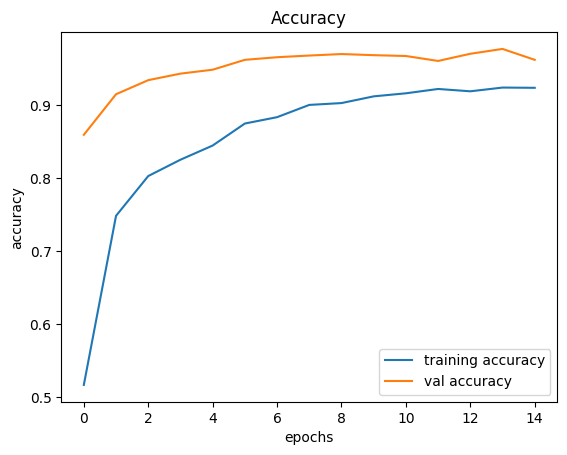

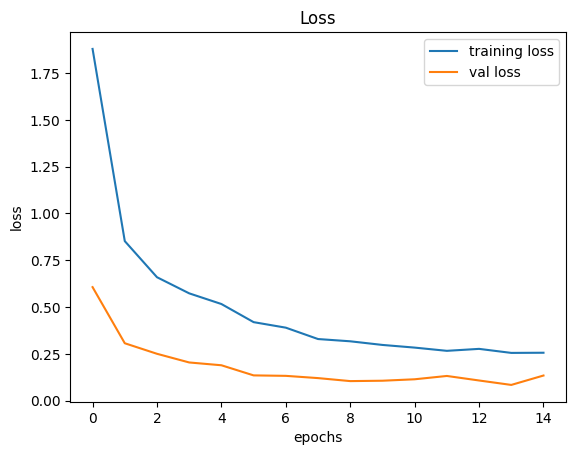

In [12]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# ACCURACY WITH TEST **DATA**

In [13]:
import pandas as pd
import numpy as np
from PIL import Image
import tensorflow as tf
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('/content/gtsrb/Test.csv')   # <-- updated path

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data = []

with tf.device('/GPU:0'):
    for img in imgs:
        image = Image.open('/content/gtsrb/' + img)  # <-- updated path
        image = image.resize((30, 30))
        data.append(np.array(image))

X_test = np.array(data)

with tf.device('/GPU:0'):
    pred = np.argmax(model.predict(X_test), axis=-1)

print(accuracy_score(labels, pred))


395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
0.9144893111638955


# SAVING MODEL FOR LATER **USE**

In [14]:
model.save('traffic_classifier.h5')